# Hypothesis testing in Python

A tutorial by Christoph Carl Kling, datascience ät c-kling.de

GESIS - Leibniz Institute for the Social Sciences

http://www.c-kling.de

This work is licensed under a Creative Commons Attribution 4.0 International License:
https://creativecommons.org/licenses/by/4.0/

## Preparation and Basics

Here we introduce concepts relevant for hypothesis testing, such as
* The normal distribution class in Python
* Maxmimum-Likelihood-Estimation
* Confidence intervals
* Sampling distributions

### Preparation

We start by telling Python to print plots in the notebook. 
Then we load the required libraries.

In [1]:
#Plot directly in the notebook
%matplotlib inline
#Statistics library
from scipy import stats as stats
#Library for plotting
import matplotlib.pyplot as plt
#Basic library for data manipulation
import numpy as np
#Pandas
import pandas as pd

## Dataset 
We want to test, if the diet has an impact on the measured body weight of people. There are three classes:

* Omnivore diet = 0
* Carnivore diet = 1
* Herbivore diet = 2

**1)** Create an instance of the *pd.DataFrame()* class and load the data from the comma separated value file *data/diet.csv* using the *from_csv()* function.

Print the head of the dataframe using *print()* and the method *head()* from the DataFrame.

In [2]:
df = pd.DataFrame();
df = df.from_csv("data/diet.csv");

print(df.head());

    bodyweight  diet
ID                  
0    74.277721     0
1    83.757289     0
2    56.637713     0
3    79.910742     1
4    79.729190     1


**2)** Create each three vectors for users doing diet 0, diet 1 and diet 2.

In [3]:
ov = df["bodyweight"][df["diet"]==0];
cv = df["bodyweight"][df["diet"]==1];
hv = df["bodyweight"][df["diet"]==2];

**3)**
Use the functions
* len()
* np.mean()

to print the group sizes, group means and group variances.

In [4]:
print("Group sizes:",len(ov),len(cv),len(hv));
print("Group means:",np.mean(ov),np.mean(cv),np.mean(hv));

Group sizes: 100 100 100
Group means: 69.07658428 75.02535076 75.18978055


**4)** Use the method
* np.var()

to calculate the variances of each group.

In [5]:
print("Group variances:",np.var(ov),np.var(cv),np.var(hv));

Group variances: 105.721897927 104.093446359 87.0318651783


**5)** Use *plt.hist()* to print histograms of each array.

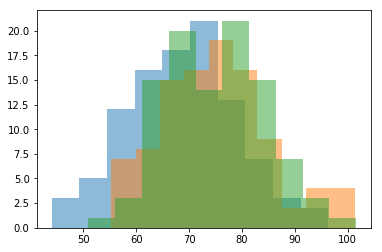

In [6]:
plt.hist(ov,alpha=0.5);
plt.hist(cv,alpha=0.5);
plt.hist(hv,alpha=0.5);

**6)** Use *stats.ttest_ind()* to calculate the t statistic and p-value for Student's t-test on all pairings of the different diet groups values. Interpret the p-value. Which parameters are significant at significance level $\alpha=0.05$?

**7)** Do we have to correct our significance level if we do multiple tests?

In [7]:
t_oc, p_value_oc = stats.ttest_ind(ov, cv);
t_oh, p_value_oh = stats.ttest_ind(ov, hv);
t_ch, p_value_ch = stats.ttest_ind(cv, hv);
print("OV-CV: The test statistics are",t_oc,"and the p-values are",p_value_oc);
print("OV-HV: The test statistics are",t_oh,"and the p-values are",p_value_oh);
print("CV-HV: The test statistics are",t_ch,"and the p-values are",p_value_ch);

OV-CV: The test statistics are -4.08625904821 and the p-values are 6.36599660704e-05
OV-HV: The test statistics are -4.38111349567 and the p-values are 1.91297073466e-05
CV-HV: The test statistics are -0.118342024965 and the p-values are 0.905916630642


**8)** Use *stats.f_oneway()* to calculate the F statistic and p-value for ANOVA on the different diet groups values. Interpret the result! (Our significance level is $\alpha=0.05$.)

In [8]:
F, p_value = stats.f_oneway(ov, cv, hv);
print("The test statistics F is",F,"and the p-value is",p_value)

The test statistics F is 12.1372486995 and the p-value is 8.57450731376e-06


In [9]:
#We sample 100 values from different normal distributions:

mu_1 = 70
mu_2 = 75
mu_3 = 69.5

sizes = 100;

sigma_anova = 10;

normal_dist_1 = stats.norm(mu_1,sigma_anova);
normal_dist_2 = stats.norm(mu_2,sigma_anova);
normal_dist_3 = stats.norm(mu_3,sigma_anova);

normal_values = np.append([normal_dist_1.rvs(size=sizes)],[normal_dist_2.rvs(size=sizes),normal_dist_2.rvs(size=sizes)]);

indices = np.arange(0,sizes*3);
indices_groups = [0]*sizes;
indices_groups.extend([1]*sizes);
indices_groups.extend([2]*sizes);

np.random.shuffle(indices);

for i in range(0,sizes*3):
    si = indices[i];
    print("%i,%f,%i"%(i,normal_values[si],indices_groups[si]));

0,76.528570,0
1,62.633164,0
2,102.593968,1
3,71.815255,2
4,72.622663,1
5,68.339724,2
6,79.983236,0
7,68.527558,0
8,88.497539,0
9,73.258892,2
10,85.876564,2
11,91.919307,2
12,80.312501,2
13,93.094846,1
14,90.576643,2
15,60.913861,1
16,83.864353,1
17,39.853357,0
18,79.858735,0
19,64.473035,1
20,67.933632,2
21,61.566710,0
22,78.555470,0
23,74.659213,1
24,75.024692,0
25,69.051796,1
26,74.370610,0
27,79.152482,1
28,84.069563,2
29,54.197102,0
30,63.122989,1
31,82.804782,2
32,94.500150,1
33,62.544652,0
34,67.808861,2
35,82.927259,2
36,84.031665,0
37,67.443302,2
38,52.599672,0
39,78.210637,2
40,73.982038,2
41,62.529293,1
42,70.090563,0
43,56.039414,1
44,70.117134,0
45,89.779835,2
46,71.509584,0
47,82.226918,2
48,74.768981,1
49,75.697965,1
50,76.618716,2
51,67.447281,1
52,72.681308,0
53,69.470340,2
54,58.118406,0
55,83.118339,1
56,97.776301,1
57,66.935592,2
58,77.406037,0
59,67.853899,1
60,44.729401,0
61,72.146848,0
62,76.114999,0
63,87.904404,2
64,78.179282,1
65,67.563170,1
66,79.319998,0
67,5

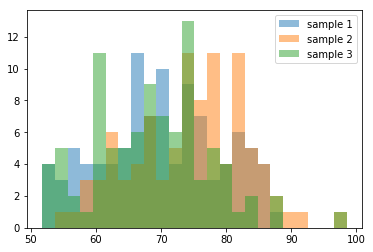

The test statistics F is 11.1395224111 and the p-value is 2.1628481037e-05


In [10]:
#We sample 100 values from different normal distributions:

mu_1 = 70
mu_2 = 75
mu_3 = 69.5

sizes = 100;

sigma_anova = 10;

normal_dist_1 = stats.norm(mu_1,sigma_anova);
normal_dist_2 = stats.norm(mu_2,sigma_anova);
normal_dist_3 = stats.norm(mu_3,sigma_anova);

normal_values = normal_dist_1.rvs(size=100);
normal_values_2 = normal_dist_2.rvs(size=100);
normal_values_3 = normal_dist_3.rvs(size=100);


bins = np.linspace(min(normal_values), max(normal_values_3), 25)
plt.hist(normal_values,bins,label='sample 1',alpha=0.5);
plt.hist(normal_values_2,bins,label='sample 2',alpha=0.5);
plt.hist(normal_values_3,bins,label='sample 3',alpha=0.5);
plt.legend(loc='upper right')
plt.show();


F, p_value = stats.f_oneway(normal_values, normal_values_2, normal_values_3);
print("The test statistics F is",F,"and the p-value is",p_value)